In [2]:
import sys
print(sys.path)

['', '/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '/Users/thanhng/Library/Python/3.6/lib/python/site-packages', '/usr/local/lib/python3.6/site-packages', '/usr/local/Cellar/numpy/1.14.3_1/libexec/nose/lib/python3.6/site-packages', '/usr/local/lib/python3.6/site-packages/IPython/extensions', '/Users/thanhng/.ipython', '/Users/thanhng', '/Users/thanhng/adaptive_confound']


In [81]:
%run ANN_TRAIN_TOGETHER.py

In [69]:
import pandas as pd
data = pd.read_csv('osteo_cal_sodium_decile.csv') 
data.shape

(61022, 201)

In [75]:
import tensorflow as tf
from tensorflow.keras import layers

ann = tf.keras.Sequential([
layers.Dense(150, activation='relu', input_shape=(120,), kernel_regularizer="l2"),
layers.Dense(50, activation='relu', kernel_regularizer="l2"),
layers.Dense(1, activation='sigmoid')])

ann.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

F    53852
M     7170
Name: sex, dtype: int64
0    53852
1     7170
Name: sex_cat, dtype: int64 

white     36438
black     17256
others     7328
Name: Race_Cat_combine, dtype: int64
2    36438
0    17256
1     7328
Name: race, dtype: int64 

from_50_to_70    25908
from_70_to_80    14712
more_than_80     12154
from_30_to_50     7264
less_than_30       984
Name: Age_combine, dtype: int64
1    25908
2    14712
4    12154
0     7264
3      984
Name: age, dtype: int64 

OHE shape:  (61022, 122) 

Cols: Index(['Strata', 'osteo_predict', 'Alcohol_Prior', 'Tobacco_Prior',
       'Drug_antipsych_prior', 'Drug_Estrogens_prior',
       'Drug_Glucocorticoids_prior', 'Drug_Nsaids_prior', 'Drug_Opiates_prior',
       'Drug_Thiazide_prior',
       ...
       'sex_cat_0', 'sex_cat_1', 'race_0', 'race_1', 'race_2', 'age_0',
       'age_1', 'age_2', 'age_3', 'age_4'],
      dtype='object', length=122)

+++++++++++++++++++++++++++++++++++++++++++


finish another fold
==================== wait for me...

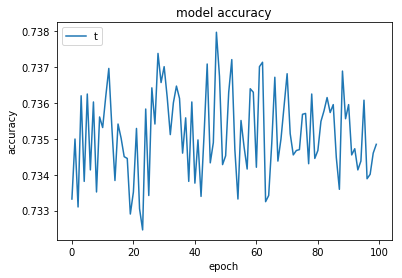

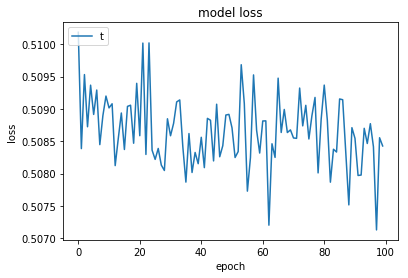

classification_report of whole model: 
              precision    recall  f1-score   support

          0       0.73      0.74      0.74     10170
          1       0.74      0.73      0.74     10170

avg / total       0.74      0.74      0.74     20340
 

confusion_matrix of whole model: 
 [[7543 2627]
 [2730 7440]] 

AUC of whole model:  0.7366273352999018

+++++++++++++++++++++++++++++++++++++++++++

subgroups: 
 0    53852
1     7170
Name: sex_cat, dtype: int64


sex_cat_0
             precision    recall  f1-score   support

          0       0.72      0.76      0.74     26926
          1       0.75      0.71      0.73     26926

avg / total       0.73      0.73      0.73     53852

[[20524  6402]
 [ 7939 18987]]
AUC of:  sex_cat_0 0.7336960558567928
----------------

sex_cat_1
             precision    recall  f1-score   support

          0       0.72      0.80      0.75      3585
          1       0.77      0.68      0.73      3585

avg / total       0.74      0.74      0.74   

In [82]:
ANN_TRAIN_TOGETHER(data, ann)